<a href="https://colab.research.google.com/github/njd4dude/WRAM/blob/main/wildFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hornet Hacks 2024
## Roundtable Rascals
## Wildfire Risk Prediction Map Generator

# Stage 1: Exploratory Data Analysis

First we install and import the necesarry libraries. Since the dataset is stored in hdf5 files we use h5py

In [ ]:
!pip install h5py
!pip install hdf5plugin

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/


'10 6 2022 Anthro.gdoc'
'1 25 CSC 135 Notes.gdoc'
 135AS3.gdoc
''$'\n'' (1).txt'
'3 29 22 NUFD Lecture.gdoc'
'3 30 22 BIO 10 Lecture.gdoc'
'3 8 2022 NUFD.gdoc'
'4 5 2022 NUFD Lecture.gdoc'
 5_output.gdoc
'9 23 CSC 137.gdoc'
'9 23 CSC 138.gdoc'
'9 7 CSC speaker notes.gdoc'
'9 9 CSC 137 Notes.gdoc'
'about me for intern apps.gdoc'
'Academic Summary Revision Plan.gdoc'
'Academic Summary Workshop Draft2.gdoc'
'ACTIVITY 4 SAC STATE.gdoc'
'Advertising Design HW #2.gdoc'
'Annotated Bib Draft #2.gdoc'
'Annotated Bib (entry#1).gdoc'
'Annotated Bib (entry#2).gdoc'
'Annotated Bib (entry#3).gdoc'
'ANNOTATED BIBLIOGRAPHY ASSIGNMENT (DUE Sunday 03 31).gdoc'
'Annotated Bibliography(Nathan Donato).gdoc'
'Annotated Bib Revised Draft(ENGL 20).gdoc'
'ANTH 11.1.22.gdoc'
'ANTH 11 3 2022.gdoc'
'Anth 12 8 22.gdoc'
'ANTH 4 9 1 2022.gdoc'
'ANTHRO 10 27 22.gdoc'
'ANTHRO 10 4 22.gdoc'
'Anthro 9 15.gdoc'
'Anthro 9 20.gdoc'
'ANTHRO 9 27 2022.gdoc'
'Anthro 9 29 22.gdoc'
'Anthro chapter 3 9 22 22.gdoc'
'Application E

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import hdf5plugin
import os
import tensorflow
from tensorflow.keras.layers import Conv2D,\
	MaxPool2D, Conv2DTranspose, Input, Activation,\
	Concatenate, CenterCrop
from tensorflow.keras import Model
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import schedules, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
import random
from scipy.ndimage import label

In [ ]:
# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/california_0.hdf5', 'r') as f:
    # List all groups
    print("Keys: %s" % list(f.keys()))

    # Get data from the group '0'
    data = f['0']

    # List all datasets or subgroups inside the group
    print("Keys inside group '0': %s" % list(data.keys()))
    print("Keys inside group '0' length: %s" % len(list(data.keys())))

    # Access the first instance inside the group '0'
    first_instance_key = list(data.keys())[0]  # Get the first key (e.g., '35579f9f-...')
    instance_1 = data[first_instance_key]

    # List keys in the first instance
    print("Keys: %s" % list(instance_1.keys()))
    print(instance_1)

    # Access 'pre_fire' or 'post_fire' image data
     # Access 'pre_fire' and 'post_fire' image data

    pre_fire_1 = instance_1['pre_fire'][:]

    post_fire_1 = instance_1['post_fire'][:]

    mask = instance_1['mask'][:]

    print(pre_fire_1.shape)

    print(f"prefire type: ", pre_fire_1.dtype)

Keys: ['0']
Keys inside group '0': ['35579f9f-0a51-459b-9dab-299f2c2b0b75', '49670c68-4c66-4389-bd72-9a9392ffae99', '50bcf608-940f-4cbc-a8de-45d85c0c207e', '5f6aafe9-a51b-49a8-84f3-9a09ae7614c3', '6ce804b1-5d1c-4502-bdc3-b27b9e239026', '8b5e9e2d-d6f8-4e31-a6a5-e789c60c674a', 'a3860995-397e-4278-8605-0364312ddb92', 'be0a7b99-eb39-4c67-915b-9b3dd4020c53', 'd03f3037-ac5f-49f2-aba2-aa116d1dda1d', 'd0d127a3-a564-4b3f-9b74-fbea18a57c01', 'e8d8a198-a697-441e-b111-106d6c25fd1f', 'edc26d10-4a59-495b-8176-543e46c5cfdd']
Keys inside group '0' length: 12
Keys: ['mask', 'post_fire', 'pre_fire']
<HDF5 group "/0/35579f9f-0a51-459b-9dab-299f2c2b0b75" (3 members)>
(5490, 5490, 12)
prefire type:  uint8


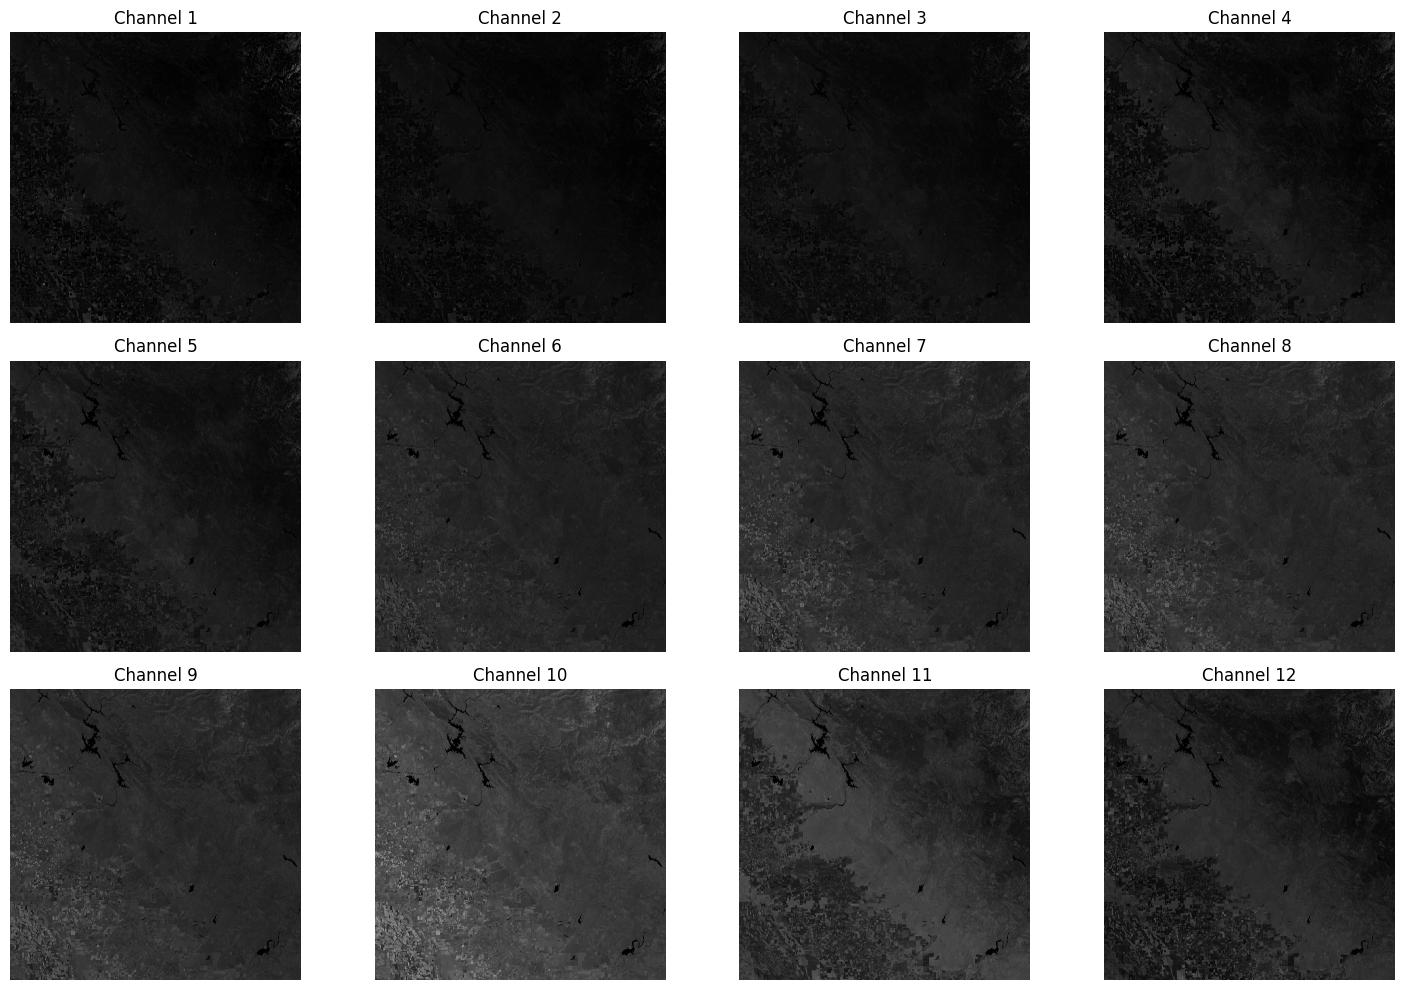

In [ ]:
# Plot each channel separately
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i in range(12):
    axes[i].imshow(pre_fire_1[:, :, i], cmap='gray')
    axes[i].set_title(f"Channel {i + 1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

mask fire type:uint8 
mask fire shape:(5490, 5490)


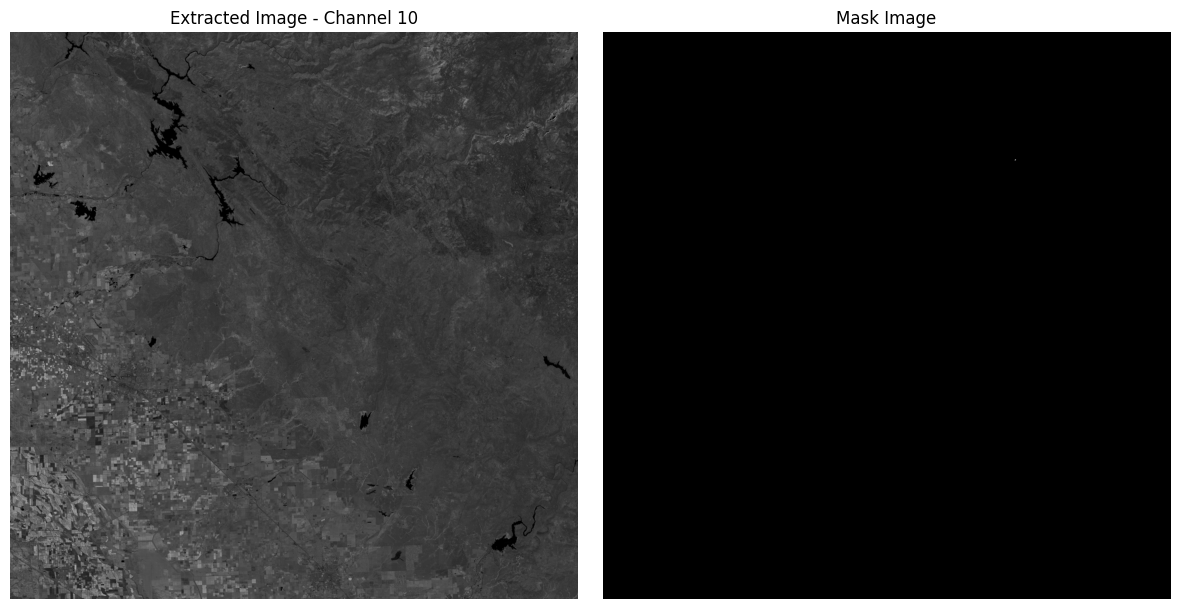

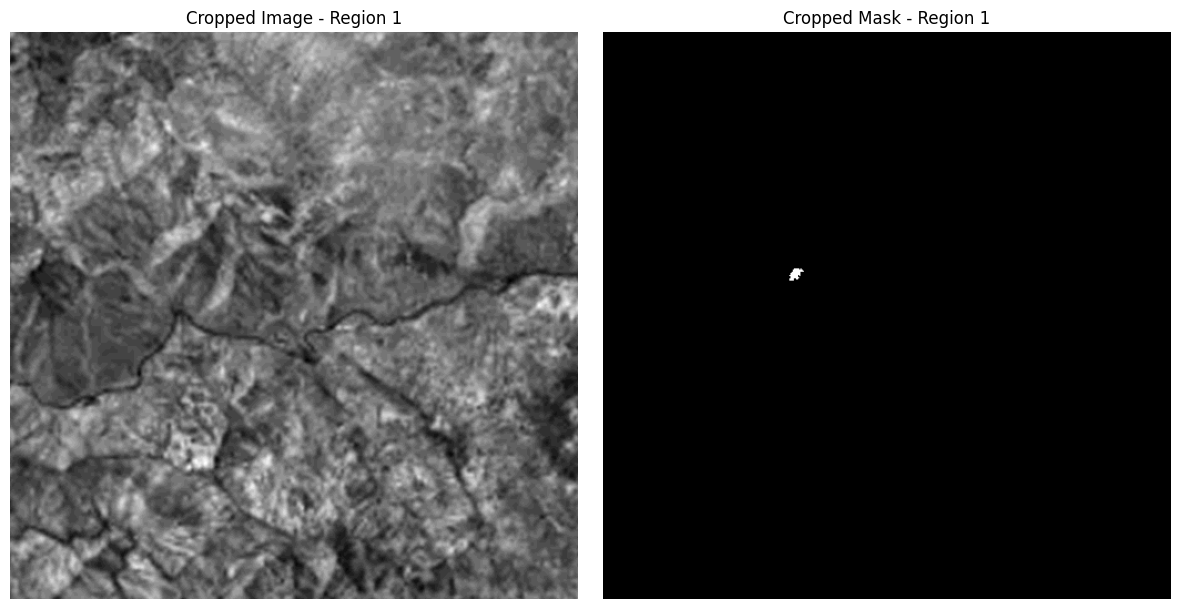

In [ ]:
# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/california_0.hdf5', 'r') as f:
    # Access the group '0'
    data = f['0']

    # Access the first instance inside the group '0'
    first_instance_key = list(data.keys())[0]  # Get the first key (e.g., '35579f9f-...')
    instance_1 = data[first_instance_key]

    # Access 'pre_fire' image data
    pre_fire_1 = instance_1['pre_fire'][:]

    # Access "mask" image data
    mask_fire_1 = instance_1['mask'][:]  # This should be just the mask without channel indexing

    # Extract one image (for example, the first channel)
    channel_to_extract = 9  # Change this index to extract a different channel
    image = pre_fire_1[:, :, channel_to_extract]

    # Get the coordinates where the mask is equal to 1]
    print(f"mask fire type:{mask_fire_1.dtype} ")
    print(f"mask fire shape:{mask_fire_1.shape}")
    labeled_mask, num_features = label(mask_fire_1)  # Label connected components in the mask

    # Set up a figure to display results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Show the extracted image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f"Extracted Image - Channel {channel_to_extract + 1}")
    axes[0].axis('off')  # Hide axis

    # Show the mask image
    axes[1].imshow(mask_fire_1, cmap='gray')  # Use cmap='gray' for grayscale
    axes[1].set_title("Mask Image")
    axes[1].axis('off')  # Hide axis

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    target_size = 512  # Desired size for cropped images
    if num_features > 0:  # Check if any features were found
        for i in range(1, num_features + 1):  # Iterate through each connected component
            # Get the coordinates for each component
            coords = np.argwhere(labeled_mask == i)

            # Get the bounding box for the component
            y_min, x_min = coords.min(axis=0)
            y_max, x_max = coords.max(axis=0)

            # Calculate the center of the component
            center_y = (y_min + y_max) // 2
            center_x = (x_min + x_max) // 2

            # add a random offset between -128,128 pixels in the x-y direction

            center_y = center_y + random.randint(-128,128)
            center_x = center_x + random.randint(-128,128)

            # Calculate the crop boundaries
            y_start = max(0, center_y - target_size // 2)
            y_end = min(image.shape[0], center_y + target_size // 2)
            x_start = max(0, center_x - target_size // 2)
            x_end = min(image.shape[1], center_x + target_size // 2)

            # Adjust if cropping goes out of bounds
            if (y_end - y_start < target_size) or (x_end - x_start < target_size):
                # Handle the case where the crop exceeds the image boundaries
                y_start = max(0, center_y - (target_size - (y_end - y_start)) // 2)
                y_end = min(image.shape[0], center_y + (target_size - (y_end - y_start)) // 2)
                x_start = max(0, center_x - (target_size - (x_end - x_start)) // 2)
                x_end = min(image.shape[1], center_x + (target_size - (x_end - x_start)) // 2)

            # Crop the pre-fire image using the adjusted boundaries
            cropped_image = image[y_start:y_end, x_start:x_end]
            cropped_mask = mask_fire_1[y_start:y_end, x_start:x_end]

            # If the crop size is smaller than target_size, pad it with zeros
            if cropped_image.shape[0] < target_size or cropped_image.shape[1] < target_size:
                padded_image = np.zeros((target_size, target_size), dtype=cropped_image.dtype)
                padded_image[
                    (target_size - cropped_image.shape[0]) // 2 : (target_size - cropped_image.shape[0]) // 2 + cropped_image.shape[0],
                    (target_size - cropped_image.shape[1]) // 2 : (target_size - cropped_image.shape[1]) // 2 + cropped_image.shape[1]
                ] = cropped_image
                cropped_image = padded_image

                # Similarly pad the cropped mask
                padded_mask = np.zeros((target_size, target_size), dtype=cropped_mask.dtype)
                padded_mask[
                    (target_size - cropped_mask.shape[0]) // 2 : (target_size - cropped_mask.shape[0]) // 2 + cropped_mask.shape[0],
                    (target_size - cropped_mask.shape[1]) // 2 : (target_size - cropped_mask.shape[1]) // 2 + cropped_mask.shape[1]
                ] = cropped_mask
                cropped_mask = padded_mask

            # Display the cropped image and mask for each component
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            # Show the cropped image
            axes[0].imshow(cropped_image, cmap='gray')
            axes[0].set_title(f"Cropped Image - Region {i}")
            axes[0].axis('off')  # Hide axis

            # Show the cropped mask image
            axes[1].imshow(cropped_mask, cmap='gray')
            axes[1].set_title(f"Cropped Mask - Region {i}")
            axes[1].axis('off')  # Hide axis

            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()

    else:
        print("No regions found in the mask where the value is 1.")


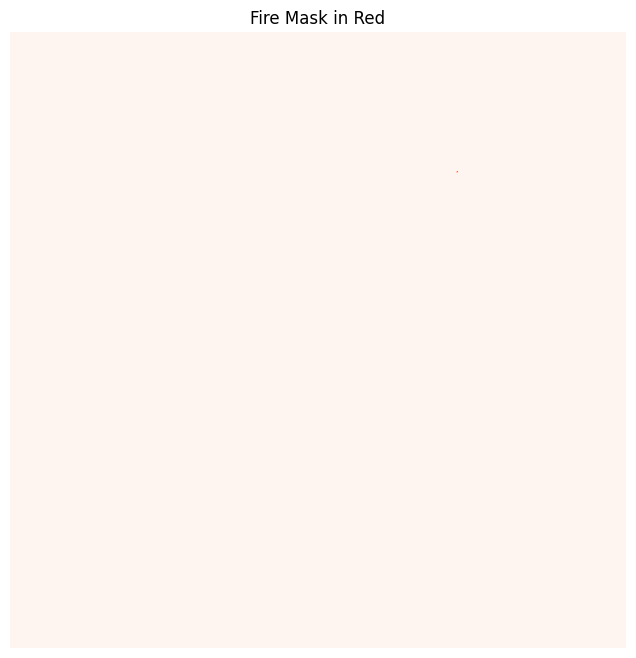

In [ ]:
# Plot the binary mask with red for active regions and transparent for inactive regions
plt.figure(figsize=(8, 8))

# Use the 'Reds' colormap and set the alpha transparency based on the mask values
plt.imshow(mask, cmap='Reds')  # Alpha will be 0 where mask is 0, 1 where mask is 1
plt.title("Fire Mask in Red")
plt.axis('off')

plt.show()

Original Channel (2D Array):
[[25 25 25 ... 19 19 19]
 [25 25 25 ... 19 19 19]
 [24 24 24 ... 19 19 19]
 ...
 [21 21 20 ... 24 24 24]
 [21 21 21 ... 24 24 24]
 [21 21 21 ... 24 24 24]]

Normalized Channel (2D Array):
[[0.28089888 0.28089888 0.28089888 ... 0.21348315 0.21348315 0.21348315]
 [0.28089888 0.28089888 0.28089888 ... 0.21348315 0.21348315 0.21348315]
 [0.26966292 0.26966292 0.26966292 ... 0.21348315 0.21348315 0.21348315]
 ...
 [0.23595506 0.23595506 0.2247191  ... 0.26966292 0.26966292 0.26966292]
 [0.23595506 0.23595506 0.23595506 ... 0.26966292 0.26966292 0.26966292]
 [0.23595506 0.23595506 0.23595506 ... 0.26966292 0.26966292 0.26966292]]
Original Channel - Min: 0, Max: 89
Normalized Channel - Min: 0.0, Max: 1.0


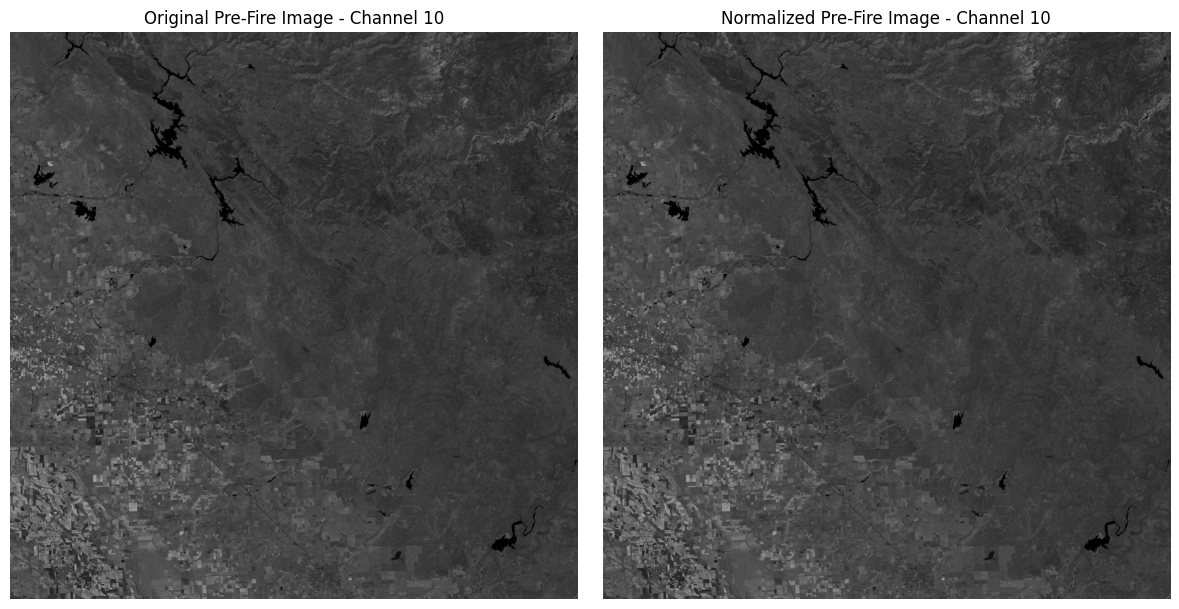

In [ ]:
# NORMALIZE
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the HDF5 file and load data
with h5py.File('/content/drive/MyDrive/california_0.hdf5', 'r') as f:
    # Access the group '0'
    data = f['0']

    # Access the first instance inside the group '0'
    first_instance_key = list(data.keys())[0]
    instance_1 = data[first_instance_key]

    # Access 'pre_fire' data
    pre_fire_1 = instance_1['pre_fire'][:]

# Normalize function
def normalize_image(img):
    """Normalize the input image to the range [0, 1]."""
    img_min = np.min(img)
    img_max = np.max(img)
    if img_max - img_min == 0:
        return np.zeros_like(img)  # Handle constant-valued images
    return (img - img_min) / (img_max - img_min)

# Example: Extract and normalize a specific channel
channel_to_extract = 9  # Extract the 10th channel (index 9)
original_channel = pre_fire_1[:, :, channel_to_extract]
normalized_channel = normalize_image(original_channel)

# Print the 2D arrays
print("Original Channel (2D Array):")
print(original_channel)

print("\nNormalized Channel (2D Array):")
print(normalized_channel)


print(f"Original Channel - Min: {np.min(original_channel)}, Max: {np.max(original_channel)}")
print(f"Normalized Channel - Min: {np.min(normalized_channel)}, Max: {np.max(normalized_channel)}")


# Display the original and normalized pre-fire image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_channel, cmap='gray')
axes[0].set_title(f"Original Pre-Fire Image - Channel {channel_to_extract + 1}")
axes[0].axis('off')

axes[1].imshow(normalized_channel, cmap='gray')
axes[1].set_title(f"Normalized Pre-Fire Image - Channel {channel_to_extract + 1}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total number of pixels in the mask
total_pixels = mask.size

# Count the number of pixels that are 1 (indicating burned areas)
active_pixels = np.sum(mask == 1)

# Count the number of pixels that are 0 (indicating non-burned areas)
inactive_pixels = np.sum(mask == 0)

# Calculate the percentage of the image that is marked as burned
percentage_burned = (active_pixels / total_pixels) * 100

# Display the results
print(f"Total pixels: {total_pixels}")
print(f"Active (burned) pixels: {active_pixels}")
print(f"Inactive (non-burned) pixels: {inactive_pixels}")
print(f"Percentage of the image burned: {percentage_burned:.2f}%")

Total pixels: 30140100
Active (burned) pixels: 85
Inactive (non-burned) pixels: 30140015
Percentage of the image burned: 0.00%


In [ ]:

# Open each HDF5 file
for i in range(10):
    print (f"Processing file {i}")
    with h5py.File(f'/content/drive/MyDrive/california_{i}.hdf5', 'r', ) as f:
        # Get data from the group '0'
        top_level_key = list(f.keys())[0]
        if top_level_key == '0':
            data = f['0']
        else:
            data = f

        # Iterate over each instance in the group '0'
        for instance_key in data.keys():
            instance = data[instance_key]

            # if mask is not present, skip
            if 'mask' not in instance.keys():
                continue

            # Access the 'mask' data for the current instance
            mask = instance['mask'][:]

            # Calculate the total number of pixels in the mask
            total_pixels = mask.size

            # Count the number of pixels that are 1 (indicating burned areas)
            active_pixels = np.sum(mask == 1)

            # Count the number of pixels that are 0 (indicating non-burned areas)
            inactive_pixels = np.sum(mask == 0)

            # Calculate the percentage of the image that is marked as burned
            percentage_burned = (active_pixels / total_pixels) * 100

            # Display the results
            print(f"Total pixels: {total_pixels}")
            print(f"Active (burned) pixels: {active_pixels}")
            print(f"Inactive (non-burned) pixels: {inactive_pixels}")
            print(f"Percentage of the image burned: {percentage_burned:.8f}%\n")

Processing file 0
Total pixels: 30140100
Active (burned) pixels: 85
Inactive (non-burned) pixels: 30140015
Percentage of the image burned: 0.00028202%

Total pixels: 30140100
Active (burned) pixels: 3698
Inactive (non-burned) pixels: 30136402
Percentage of the image burned: 0.01226937%

Total pixels: 30140100
Active (burned) pixels: 3274
Inactive (non-burned) pixels: 30136826
Percentage of the image burned: 0.01086260%

Total pixels: 30140100
Active (burned) pixels: 2897
Inactive (non-burned) pixels: 30137203
Percentage of the image burned: 0.00961178%

Total pixels: 30140100
Active (burned) pixels: 165
Inactive (non-burned) pixels: 30139935
Percentage of the image burned: 0.00054744%

Total pixels: 30140100
Active (burned) pixels: 1005
Inactive (non-burned) pixels: 30139095
Percentage of the image burned: 0.00333443%

Total pixels: 30140100
Active (burned) pixels: 256
Inactive (non-burned) pixels: 30139844
Percentage of the image burned: 0.00084937%

Total pixels: 30140100
Active (bur

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/california_1.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Flatten every channel in the pre-fire image
flattened_image = pre_fire_1.reshape(-1, pre_fire_1.shape[-1])


# Flatten the mask
flattened_mask = mask.flatten()


# Calculate the correlation between each of the channels and the mask
correlations = np.corrcoef(flattened_image.T, flattened_mask)

# Display the correlation coefficients for each channel
print("Correlation Coefficients:")
for i, corr in enumerate(correlations[-1, :-1]):
    print(f"Channel {i + 1}: {corr:.4f}")

# Display correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Matrix")
plt.xlabel("Channels")
plt.ylabel("Channels and Mask")
plt.show()



In [ ]:
from skimage.measure import label
%matplotlib inline

# Function to normalize an image
def normalize_image(img):
    #Normalize the input image to the range [0, 1].
    img_min = np.min(img)
    img_max = np.max(img)
    if img_max - img_min == 0:
        return np.zeros_like(img)  # Handle constant-valued images
    return (img - img_min) / (img_max - img_min)

# Function to extract fire and non-fire patches
def extract_patches(image, mask, target_size=512, num_non_fire_patches=25):
    fire_patches = []
    non_fire_patches = []

    labeled_mask = label(mask)  # Label connected components in the mask
    num_features = labeled_mask.max()  # Get the number of connected components

    if num_features > 0:  # Check if any features were found
        for i in range(1, num_features + 1):  # Iterate through each connected component (fire region)
            coords = np.argwhere(labeled_mask == i)

            if coords.size > 0:
                print(f"Processing fire region {i} at first coordinate: {coords[0]}")

            y_min, x_min = coords.min(axis=0)
            y_max, x_max = coords.max(axis=0)
            center_y = (y_min + y_max) // 2
            center_x = (x_min + x_max) // 2

            # Add random offset between -128, 128 pixels in the x-y direction
            center_y += random.randint(-128, 128)
            center_x += random.randint(-128, 128)

            # Calculate crop boundaries
            y_start = max(0, center_y - target_size // 2)
            y_end = min(image.shape[0], center_y + target_size // 2)
            x_start = max(0, center_x - target_size // 2)
            x_end = min(image.shape[1], center_x + target_size // 2)

            # Crop the image
            cropped_image = image[y_start:y_end, x_start:x_end]
            cropped_mask = mask[y_start:y_end, x_start:x_end]

            # If the cropped area is smaller than target size, pad with zeros
            if cropped_image.shape[0] < target_size or cropped_image.shape[1] < target_size:
                print(f"Padding image of shape {cropped_image.shape} to target size {target_size}")
                print(f"Target center: ({center_y}, {center_x})")
                cropped_image = pad_image(cropped_image, target_size)
                cropped_mask = pad_image(cropped_mask, target_size)

            fire_patches.append((cropped_image, cropped_mask))

            # Now collect num_non_fire_patches non-fire patches
            non_fire_patches += get_non_fire_patches(image, mask, target_size, num_patches=num_non_fire_patches)

    return fire_patches, non_fire_patches

# Function to get non-fire patches
def get_non_fire_patches(image, mask, target_size, num_patches):
    non_fire_patches = []

    while len(non_fire_patches) < num_patches:
        i = np.random.randint(0, image.shape[0] - target_size)
        j = np.random.randint(0, image.shape[1] - target_size)
        patch = image[i:i+target_size, j:j+target_size]
        patch_mask = mask[i:i+target_size, j:j+target_size]

        if np.sum(patch_mask) == 0:  # No fire in the patch
            non_fire_patches.append((patch, patch_mask))

    return non_fire_patches

# Function to pad images
def pad_image(image, target_size):

    if image.ndim == 2:
        padded_image = np.zeros((target_size, target_size), dtype=image.dtype)
        padded_image[
            (target_size - image.shape[0]) // 2 : (target_size - image.shape[0]) // 2 + image.shape[0],
            (target_size - image.shape[1]) // 2 : (target_size - image.shape[1]) // 2 + image.shape[1]
        ] = image
    else:
        padded_image = np.zeros((target_size, target_size, image.shape[-1]), dtype=image.dtype)
        padded_image[
            (target_size - image.shape[0]) // 2 : (target_size - image.shape[0]) // 2 + image.shape[0],
            (target_size - image.shape[1]) // 2 : (target_size - image.shape[1]) // 2 + image.shape[1],
            :
        ] = image
    return padded_image

# Functions to store patches in HDF5 file
def append_to_dataset(hdf_file, dataset_name, data):
    """Append data to an existing dataset or create a new one if it doesn't exist."""
    if dataset_name in hdf_file:
        dataset = hdf_file[dataset_name]
        dataset.resize((dataset.shape[0] + data.shape[0]), axis=0)
        dataset[-data.shape[0]:] = data
    else:
        maxshape = (None,) + data.shape[1:]
        hdf_file.create_dataset(dataset_name, data=data, maxshape=maxshape)

def store_patches_in_hdf5(fire_patches, non_fire_patches, instance_key, filename_prefix="fire_patches"):
    fire_images, fire_masks = zip(*fire_patches)
    non_fire_images, non_fire_masks = zip(*non_fire_patches)

    fire_images = np.array(fire_images)
    fire_masks = np.array(fire_masks)
    non_fire_images = np.array(non_fire_images)
    non_fire_masks = np.array(non_fire_masks)

    filename_prefix = f"{filename_prefix}_{instance_key}.h5"

    with h5py.File(filename_prefix, 'a') as hdf_file:
        append_to_dataset(hdf_file, "fire_images", fire_images)
        append_to_dataset(hdf_file, "fire_masks", fire_masks)
        append_to_dataset(hdf_file, "non_fire_images", non_fire_images)
        append_to_dataset(hdf_file, "non_fire_masks", non_fire_masks)

def augment_patch(image, mask, num_augmentations=5):

    """Apply random augmentation to the image and mask."""
    augmented_images = []
    augmented_masks = []

    augmented_images.append(image)
    augmented_masks.append(mask)

    for _ in range(num_augmentations):
        augmented_image = np.copy(image)
        augmented_mask = np.copy(mask)

        # Flip horizontally
        if random.random() > 0.5:
            augmented_image = np.fliplr(augmented_image)
            augmented_mask = np.fliplr(augmented_mask)

        # Flip vertically
        if random.random() > 0.5:
            augmented_image = np.flipud(augmented_image)
            augmented_mask = np.flipud(augmented_mask)

        # Rotate by a random right angle
        num_rotations = random.randint(0, 3)
        augmented_image = np.rot90(augmented_image, num_rotations)
        augmented_mask = np.rot90(augmented_mask, num_rotations)

        augmented_images.append(augmented_image)
        augmented_masks.append(augmented_mask)

    return augmented_images, augmented_masks


# Example pipeline execution
def run_pipeline(hdf5_filename, instance_key='0'):
    with h5py.File(hdf5_filename, 'r') as f:
        # Access the first instance inside the group

        #Special case for the first instance
        top_level_key = list(f.keys())[0]
        data = f

        num_added_patches = 0

        for key in data.keys():
            # Access the instance
            image = data[key]
            print(f"\nProcessing instance: {key}")

            # Skip if the instance does not have the 'pre_fire' or 'mask' data
            if 'pre_fire' not in image:
                print(f"Skipping instance {key} without 'pre_fire' data.")
                continue
            if 'mask' not in image:
                print(f"Skipping instance {key} without 'mask' data.")
                continue


            # Access image and mask data
            pre_fire_1 = image['pre_fire'][:]
            mask_fire_1 = image['mask'][:]

             # Check the shape of pre_fire_1 to determine the channel position
            if pre_fire_1.shape[0] == 12:
                # Channels are in the first dimension
                normalized_image = np.stack([normalize_image(pre_fire_1[i, :, :]) for i in range(pre_fire_1.shape[0])], axis=-1)
                # Also flip the mask to match the image
                mask_fire_1 = np.stack( [mask_fire_1[i, :, :] for i in range(mask_fire_1.shape[0])], axis=-1)
                # Make the mask two dimensional, take it from (x,y,1) to (x,y)
                mask_fire_1 = mask_fire_1[:,:,0]

            else:
                # Channels are in the last dimension
                normalized_image = np.stack([normalize_image(pre_fire_1[:, :, i]) for i in range(pre_fire_1.shape[-1])], axis=-1)


            # Extract patches
            fire_patches, non_fire_patches = extract_patches(normalized_image, mask_fire_1)

            # Display the number of patches extracted, and the different shapes present
            print(f"Number of fire patches: {len(fire_patches)}")
            print(f"Number of non-fire patches: {len(non_fire_patches)}")


            # Augment fire patches only
            augmented_fire_patches = []



            for fire_image, fire_mask in fire_patches:
                augmented_images, augmented_masks = augment_patch(fire_image, fire_mask)
                augmented_fire_patches.extend(list(zip(augmented_images, augmented_masks)))


            # Display the number of patches extracted, and the different shapes present
            print(f"Number of augmented fire patches: {len(augmented_fire_patches)}")


            # Store patches in an HDF5 file
            store_patches_in_hdf5(augmented_fire_patches, non_fire_patches,  filename_prefix="fire_patches", instance_key=instance_key)
            num_added_patches += len(augmented_fire_patches)
        print(f"Number of patches attempted added in file {hdf5_filename}: {num_added_patches}")
        num_actual_added = 0
        with h5py.File(f'fire_patches_{instance_key}.h5', 'r') as f:
            num_actual_added = len(f['fire_images'])
        print(f"Number of patches actually added in file {hdf5_filename}: {num_actual_added}")
        return num_added_patches


In [ ]:
# Run the pipeline for each california_{i}.hdf5 where i is in range(0, 10)
num_augmented_images = 0
for i in range(10):
    print(f"Running pipeline for california_{i}.hdf5")
    num_augmented_images += run_pipeline(f'/content/drive/california_{i}.hdf5', instance_key=f'{i}')
    print("\n\n\n")
print(f"Total number of augmented images: {num_augmented_images}")


In [ ]:
# Inspect california_1.hdf5
with h5py.File('california_1.hdf5', 'r') as f:
    print("Keys: %s" % list(f.keys()))
    instance = f['0d30a00f-208f-4c9e-9aed-676527463854']
    print("Keys inside instance: %s" % list(instance.keys()))
    pre_fire_1 = instance['pre_fire'][:]
    print("Pre fire shape: %s" % (pre_fire_1.shape,))
    mask_1 = instance['mask'][:]

    # For every key in the instance, print the value classes in each mask
    for key in f.keys():
        mask = f[key]['mask'][:]
        print(f"Mask Shape: {mask.shape}")
        print(f"Mask {key} - Unique values: {np.unique(mask)}")

    # Display sample image from channel 10
    plt.imshow(pre_fire_1[9, :, :], cmap='gray')
    plt.title("Channel 10, 1-9 files")
    plt.show()

    # Display the mask
    plt.imshow(mask_1[0, :, :], cmap='Reds')
    plt.title("Mask Image")
    plt.show()





# Inspect california_0.hdf5
with h5py.File('california_0.hdf5', 'r') as f:
    print("Keys: %s" % list(f.keys()))
    instance = f['0']
    print("Keys inside instance: %s" % list(instance.keys()))
    first_key = list(instance.keys())[0]
    pre_fire_1 = instance[first_key]['pre_fire'][:]
    print("Pre fire shape: %s" % (pre_fire_1.shape,))
    mask = instance[first_key]['mask'][:]
    print(f"Mask Shape: {mask.shape}")
    print(f"Mask - Unique values: {np.unique(mask)}")

    # Display sample image from channel 10
    plt.imshow(pre_fire_1[:, :, 9], cmap='gray')
    plt.show()

    # Display the mask
    plt.imshow(mask, cmap='Reds')
    plt.title("Mask Image")
    plt.show()

In [ ]:
# Randomly visually inspect 5 of the patches in a file
with h5py.File('fire_patches_0.h5', 'r') as f:
    fire_images = f['fire_images'][:]
    fire_masks = f['fire_masks'][:]
    non_fire_images = f['non_fire_images'][:]
    non_fire_masks = f['non_fire_masks'][:]

    # Randomly select 5 indices
    indices = np.random.choice(len(fire_images), 5, replace=False)

    # Display the images and masks
    for i, idx in enumerate(indices):
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Display the dimensions of the images and masks
        print(f"Fire Image Shape: {fire_images[idx].shape}")

        # Show the fire image (channel 10) and mask
        axes[0].imshow(fire_images[idx][:, :, 9], cmap='gray')  # Channel 10 is at index 9
        axes[0].set_title(f"Fire Image {i + 1} (Channel 10)")
        axes[0].axis('off')

        axes[1].imshow(fire_masks[idx], cmap='gray')
        axes[1].set_title(f"Fire Mask {i + 1}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Show the non-fire image (channel 10) and mask
        axes[0].imshow(non_fire_images[idx][:, :, 9], cmap='gray')  # Channel 10 is at index 9
        axes[0].set_title(f"Non-Fire Image {i + 1} (Channel 10)")
        axes[0].axis('off')

        axes[1].imshow(non_fire_masks[idx], cmap='gray')
        axes[1].set_title(f"Non-Fire Mask {i + 1}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
# Count the number of fire patches and non-fire patches in the set of files fire_patches.h5_{i}.h5 for i in range(0, 10)

num_fire_patches = 0
num_non_fire_patches = 0

for i in range(10):
    filename = f'fire_patches_{i}.h5'
    print(f"Processing file: {filename}")
    with h5py.File(filename, 'r') as f:
        print(f"Shape of fire_images: {f['fire_images'].shape}")
        num_fire_patches += len(f['fire_images'])
        print(f"Number of fire patches: {len(f['fire_images'])}")
        num_non_fire_patches += len(f['non_fire_images'])

print(f"Total number of fire patches: {num_fire_patches}")
print(f"Total number of non-fire patches: {num_non_fire_patches}")

# Stage 2: Training the Model

1.   Seeding
2.   Initialization/Configuration
3.   Convolutional Block
4.   Encoder Block / Contracting Path
5.   Decoder Block / Upsampling Path
6.   Expansive Path - Skip Connections
7.   Build U-Net
8.   Initialize U-Net Model
9.   Load Dataset
10.  Training Callbacks
11.  Data Visualization
12.  Main (Put Everything together)






In [ ]:
# Model specific imports
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
import h5py
import numpy as np

In [ ]:
# Define the UNet model

def unet_model(input_size=(512, 512, 12)):
    inputs = layers.Input(input_size)

    # Encoder block 1
    encoder0 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    encoder0 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(encoder0)
    encoder1 = layers.MaxPooling2D((2, 2))(encoder0)  # Down to 256x256

    # Encoder block 2
    encoder1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(encoder1)
    encoder1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(encoder1)
    encoder2 = layers.MaxPooling2D((2, 2))(encoder1)  # Down to 128x128

    # Encoder block 3
    encoder2 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(encoder2)
    encoder2 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(encoder2)
    encoder3 = layers.MaxPooling2D((2, 2))(encoder2)  # Down to 64x64

    # Encoder block 4
    encoder3 = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(encoder3)
    encoder3 = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(encoder3)
    encoder4 = layers.MaxPooling2D((2, 2))(encoder3)  # Down to 32x32

    # Bottleneck
    bottleneck = layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(encoder4)
    bottleneck = layers.Conv2D(1024, (3, 3), padding='same', activation='relu')(bottleneck)

    # Decoder block 1
    decoder3 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bottleneck)
    decoder3 = layers.concatenate([decoder3, encoder3])  # Skip connection
    decoder3 = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(decoder3)
    decoder3 = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(decoder3)

    # Decoder block 2
    decoder2 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(decoder3)
    decoder2 = layers.concatenate([decoder2, encoder2])  # Skip connection
    decoder2 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(decoder2)
    decoder2 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(decoder2)

    # Decoder block 3
    decoder1 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(decoder2)
    decoder1 = layers.concatenate([decoder1, encoder1])  # Skip connection
    decoder1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(decoder1)
    decoder1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(decoder1)

    # Decoder block 4
    decoder0 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(decoder1)
    decoder0 = layers.concatenate([decoder0, encoder0])  # Skip connection
    decoder0 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(decoder0)
    decoder0 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(decoder0)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

    # Build the model
    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
# Compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Load data, shuffle, and split into training and validation sets through a generator

import numpy as np
import h5py
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

# Define a Data Generator class with sorted indexing
class HDF5DataGenerator(Sequence):
    def __init__(self, hdf5_file, dataset_name, mask_name, batch_size=8, indices=None, shuffle=True, **kwargs):
        super().__init__(**kwargs)
        self.hdf5_file = hdf5_file
        self.dataset_name = dataset_name
        self.mask_name = mask_name
        self.batch_size = batch_size
        self.shuffle = shuffle

        # If indices are not provided, use the whole dataset
        if indices is None:
            with h5py.File(self.hdf5_file, 'r') as f:
                self.indices = np.arange(len(f[self.dataset_name]))
        else:
            self.indices = indices

        self.on_epoch_end()

    def __len__(self):
        # Return the number of batches per epoch
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        # Generate batch indices
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Sort the indices to satisfy HDF5 indexing
        sorted_batch_indices = np.sort(batch_indices)

        # Open HDF5 file and load batch data
        with h5py.File(self.hdf5_file, 'r') as f:
            X_batch = f[self.dataset_name][sorted_batch_indices]
            y_batch = f[self.mask_name][sorted_batch_indices]

        # Reorder the batch according to the original shuffled batch_indices
        reorder_indices = np.argsort(batch_indices)
        X_batch = X_batch[reorder_indices]
        y_batch = y_batch[reorder_indices]

        # Convert to TensorFlow tensors
        X_batch = tf.convert_to_tensor(X_batch)
        y_batch = tf.convert_to_tensor(y_batch)

        return X_batch, y_batch

    def on_epoch_end(self):
        # Shuffle the data at the end of each epoch if shuffle is True
        if self.shuffle:
            np.random.shuffle(self.indices)

# Load dataset and split into train/validation sets using indices, not the actual data
with h5py.File('fire_patches_0.h5', 'r') as hdf:
    num_samples = len(hdf['fire_images'])

# Generate train/test split indices instead of splitting actual data
train_indices, val_indices = train_test_split(np.arange(num_samples), test_size=0.2, random_state=42)

# Create Data Generators for training and validation, using indices for lazy loading
train_generator = HDF5DataGenerator('fire_patches_0.h5', 'fire_images', 'fire_masks', batch_size=8, indices=train_indices, shuffle=True)
val_generator = HDF5DataGenerator('fire_patches_0.h5', 'fire_images', 'fire_masks', batch_size=8, indices=val_indices, shuffle=False)

# Verify the generators work and print the first batch shapes
X_batch, y_batch = train_generator.__getitem__(0)
print(f"X_batch shape: {X_batch.shape}, y_batch shape: {y_batch.shape}")

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
# Train the model

# Define callbacks (optional)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model during training
checkpoint = ModelCheckpoint('unet_wildfire.keras', monitor='loss', verbose=1, save_best_only=True)

# Stop training if the loss doesn't improve for several epochs
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[checkpoint, early_stopping],
    verbose=2  # Set verbosity to 2 for more detailed output
)

In [ ]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Visualize the fire prediction mask

import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)

# Function to visualize the prediction mask as a red-scale heatmap over the prefire image channel 10
def visualize_prediction(image, prediction_mask, channel=10):
    # Extract the prefire image channel 10
    prefire_channel = image[:, :, channel]

    # Create a red-scale heatmap from the prediction mask
    heatmap = np.zeros_like(image)
    heatmap[:, :, 0] = prediction_mask * 255  # Red channel
    heatmap[:, :, 1] = 0  # Green channel
    heatmap[:, :, 2] = 0  # Blue channel

    # Overlay the heatmap on the prefire image channel 10
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(prefire_channel, cmap='gray')
    ax[0].set_title('Prefire Image Channel 10')
    ax[1].imshow(prefire_channel, cmap='gray')
    ax[1].imshow(heatmap, cmap='Reds', alpha=0.5)
    ax[1].set_title('Prediction Heatmap Overlay')
    plt.show()

# Visualize the predictions for a few test images
for i in range(5):
    visualize_prediction(X_test[i], predictions[i])